# Dimensionality Reduction

## Principal Component Analysis PCA

* One of the most used Unsupervised algorithm
* Identify patterns in data
* Identify & detect correlation between variables
    * If a strong correlation is found, then can reduct dimensionality.
    * Find the direction of maximum variance in high dimensional data, and project into smaller dimensional subspace, while retaining most of the information.
* Reduce the dimensions of a d-dimensional dataset by projecting it onto a k-dimensional subspace, where k < d.

* Main function of the PCA:
    * Standardize the data.
    * Obtain the Eigenvectors & Eigenvalues from the covariance matrix or correlatioon matrix, or perform Singular Vector Decomposition.
    * Sort eigenvalues in descending order & choose the k eigenvectors that correspond to the k largest eigenvalues where k is the number of dimensions of the new feature suubspace (k <= d).
    * Construct the projection matrix W from the selected k eigenvectors.
    * Transform thee original dataset X via W to obtain a k-dimensional feature subspace Y.
    
* Rather than predicting the value, PCA attempts to learn about the relationship between X & Y values.
* Quantified by finding list of principal axes.

* Highly affected by outliers in the data.

* Important to know when working with huge dataset, reduce the complexity by reducing the dimensionality.

### Recommender system for wine

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Data Preparation

In [3]:
df = pd.read_csv('data/wine.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
X = df.drop('Customer_Segment', axis=1)
y = df['Customer_Segment']

### Splitting Data

In [5]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Applying PCA

* We are **not** removing any features, but creating new extracted features.
    * Principal Component 1, Principal Component 2...
    
* Important to apply PCA **before** training classification model to remove dimensions.

In [8]:
from sklearn.decomposition import PCA

# number of extracted features, usually starts with 2 and see the results
# If poor result & can't separate properly, try higher number
# PCA is about extracting features to explain variance

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

### Training with Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

cls = LogisticRegression(random_state = 0)
cls.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Evaluations

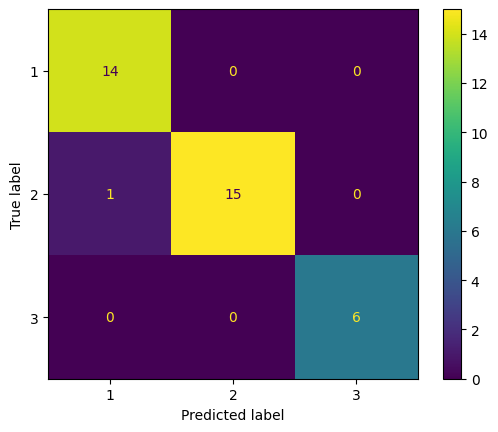

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

y_preds = cls.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_preds);

In [11]:
accuracy_score(y_test, y_preds)

0.9722222222222222

In [12]:
pd.DataFrame(classification_report(y_test, y_preds, output_dict=True))

,1,2,3,accuracy,macro avg,weighted avg
precision,0.933333,1.000000,1.0,0.972222,0.977778,0.974074
recall,1.000000,0.937500,1.0,0.972222,0.979167,0.972222
f1-score,0.965517,0.967742,1.0,0.972222,0.977753,0.972253
support,14.000000,16.000000,6.0,0.972222,36.000000,36.000000


### Visualizing Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


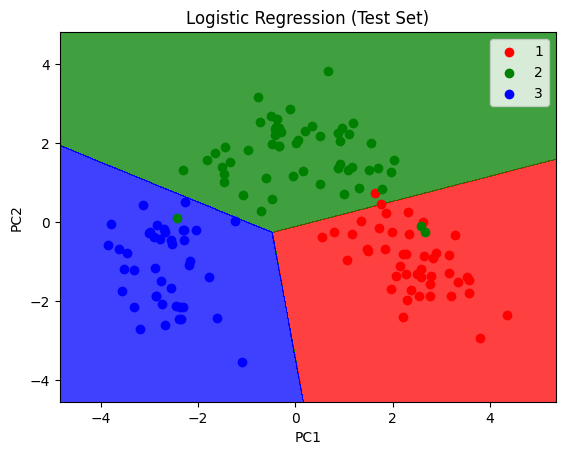

In [16]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, cls.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    
plt.title('Logistic Regression (Test Set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend();

### Visualizing Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


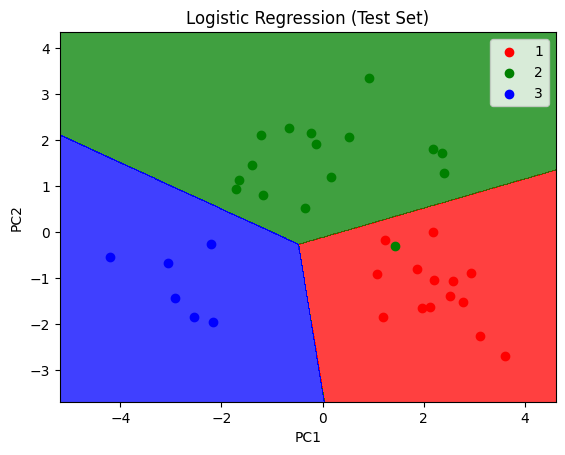

In [17]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, cls.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    
plt.title('Logistic Regression (Test Set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend();